Sandra Rojas Zegarrundo  GU3030768


Atividade - Regressão Logística Tarefa
1. Objetivo

    Utilizar a base de dados pima-indians-diabetes.data.csv e a biblioteca scikit-learn para realizar uma regressão logística.

2. Variáveis

    Variável Dependente (Alvo): Class

    Variáveis Independentes: Todas as outras variáveis do conjunto de dados.

3. Tarefas

    Realizar a regressão logística.

    Realizar o pré-processamento e a Análise Exploratória dos Dados.

    Calcular e apresentar os seguintes parâmetros para medir o desempenho:

        Acurácia

        Precisão

        Recuperação

        F1 Score

Enviar o arquivo em extensão ipynb e html ou pdf. Outras extensão de arquivo não serão aceitas.

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('pima-indians-diabetes.data.csv')

In [61]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,627,50,1
1,1,85,66,29,0,26.6,351,31,0
2,8,183,64,0,0,23.3,672,32,1
3,1,89,66,23,94,28.1,167,21,0
4,0,137,40,35,168,43.1,2288,33,1


In [62]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,171,63,0
764,2,122,70,27,0,36.8,340,27,0
765,5,121,72,23,112,26.2,245,30,0
766,1,126,60,0,0,30.1,349,47,1
767,1,93,70,31,0,30.4,315,23,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    int64  
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 54.1 KB


In [64]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
Pedigree           int64
Age                int64
Class              int64
dtype: object

In [65]:
df.shape

(768, 9)

In [66]:
df.nunique()

Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
Pedigree         517
Age               52
Class              2
dtype: int64

In [67]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Class            0
dtype: int64

<Axes: >

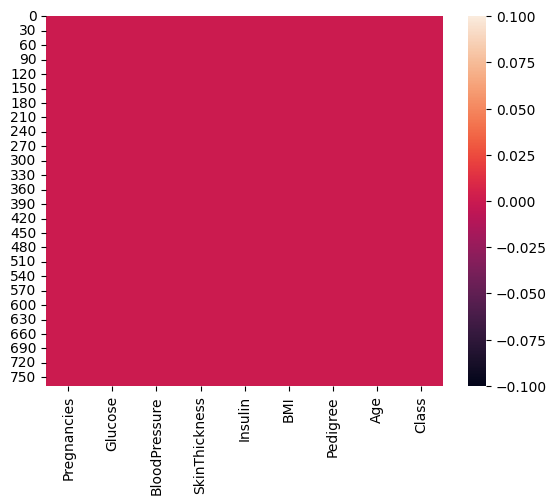

In [68]:
sns.heatmap(df.isnull())

In [69]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,471.876302,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,331.328595,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,243.750000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,372.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,626.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2420.000000,81.000000,1.000000


<Axes: >

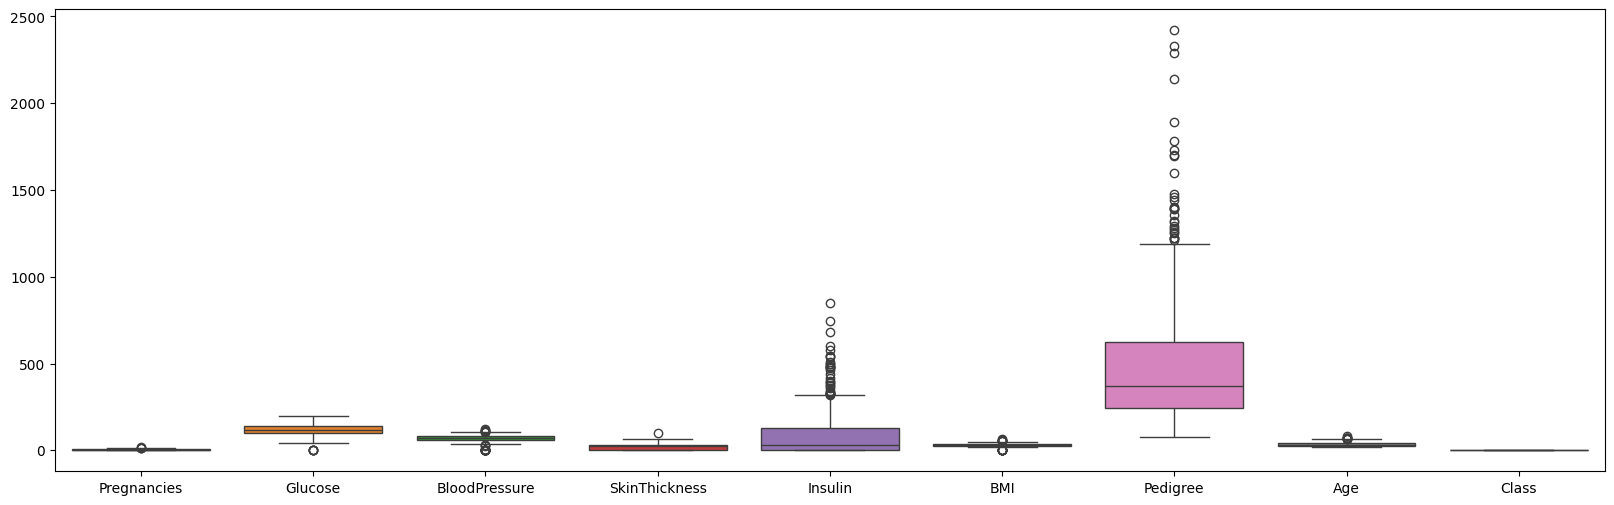

In [70]:
plt.figure(figsize=(20,6))
sns.boxplot(df)

<Axes: ylabel='Glucose'>

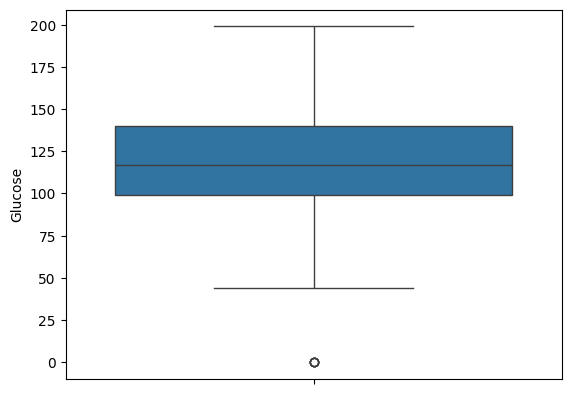

In [71]:
sns.boxplot(df['Glucose'])

In [72]:
Q1 , Q3 = np.percentile(df['Glucose'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df[(df['Glucose'] >= limite_inferior)&(df['Glucose'] <= limite_superior)]

In [73]:
Q1 , Q3 = np.percentile(df['BloodPressure'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['BloodPressure'] >= limite_inferior)&(df_limpo['BloodPressure'] <= limite_superior)]

In [74]:
Q1 , Q3 = np.percentile(df_limpo['SkinThickness'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['SkinThickness'] >= limite_inferior)&(df_limpo['SkinThickness'] <= limite_superior)]

In [75]:
Q1 , Q3 = np.percentile(df_limpo['Insulin'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['Insulin'] >= limite_inferior)&(df_limpo['Insulin'] <= limite_superior)]

In [76]:
Q1 , Q3 = np.percentile(df_limpo['BMI'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['BMI'] >= limite_inferior)&(df_limpo['BMI'] <= limite_superior)]

In [77]:
Q1 , Q3 = np.percentile(df_limpo['Pedigree'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['Pedigree'] >= limite_inferior)&(df_limpo['Pedigree'] <= limite_superior)]

In [78]:
Q1 , Q3 = np.percentile(df_limpo['Age'], [25, 75])
IRQ = Q3 -Q1
limite_inferior = Q1 - (1.5 * IRQ)
limite_superior = Q3 + (1.5 * IRQ)
df_limpo=df_limpo[(df_limpo['Age'] >= limite_inferior)&(df_limpo['Age'] <= limite_superior)]

<Axes: >

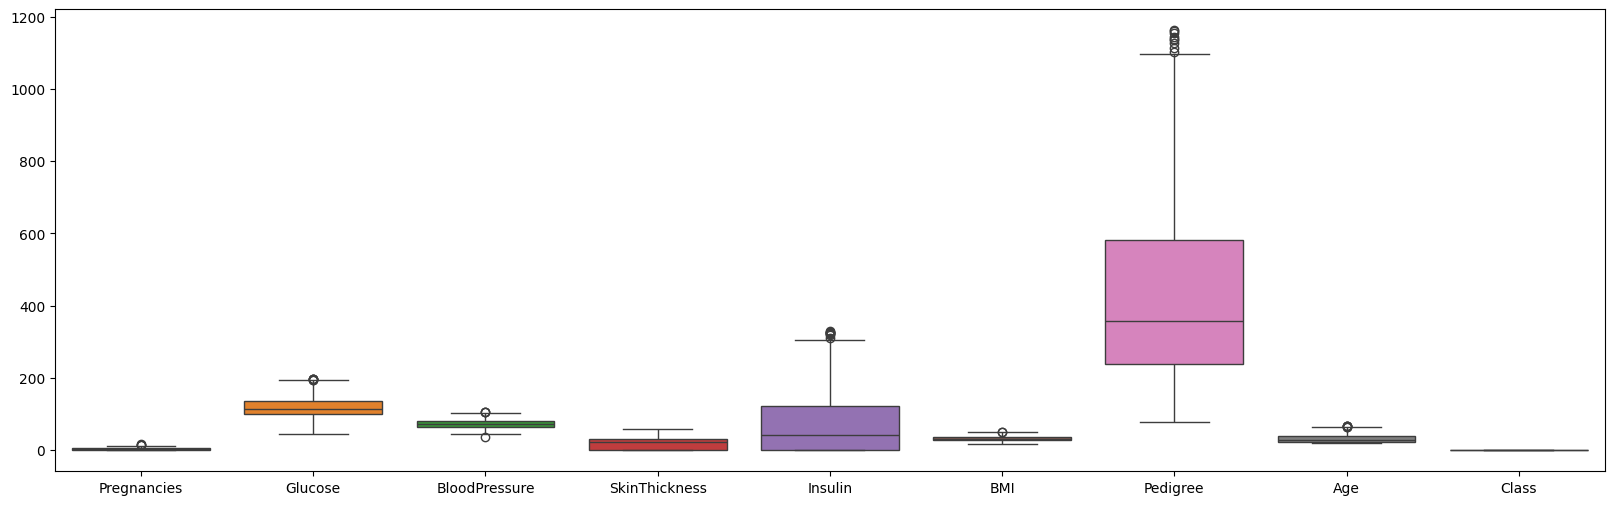

In [79]:
plt.figure(figsize=(20,6))
sns.boxplot(df_limpo)

In [80]:
df_limpo.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,627,50,1
1,1,85,66,29,0,26.6,351,31,0
2,8,183,64,0,0,23.3,672,32,1
3,1,89,66,23,94,28.1,167,21,0
5,5,116,74,0,0,25.6,201,30,0


<Axes: >

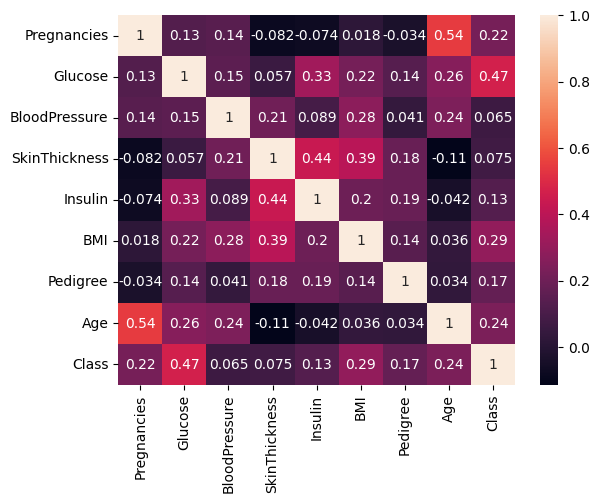

In [81]:
sns.heatmap(df.corr(), annot=True)

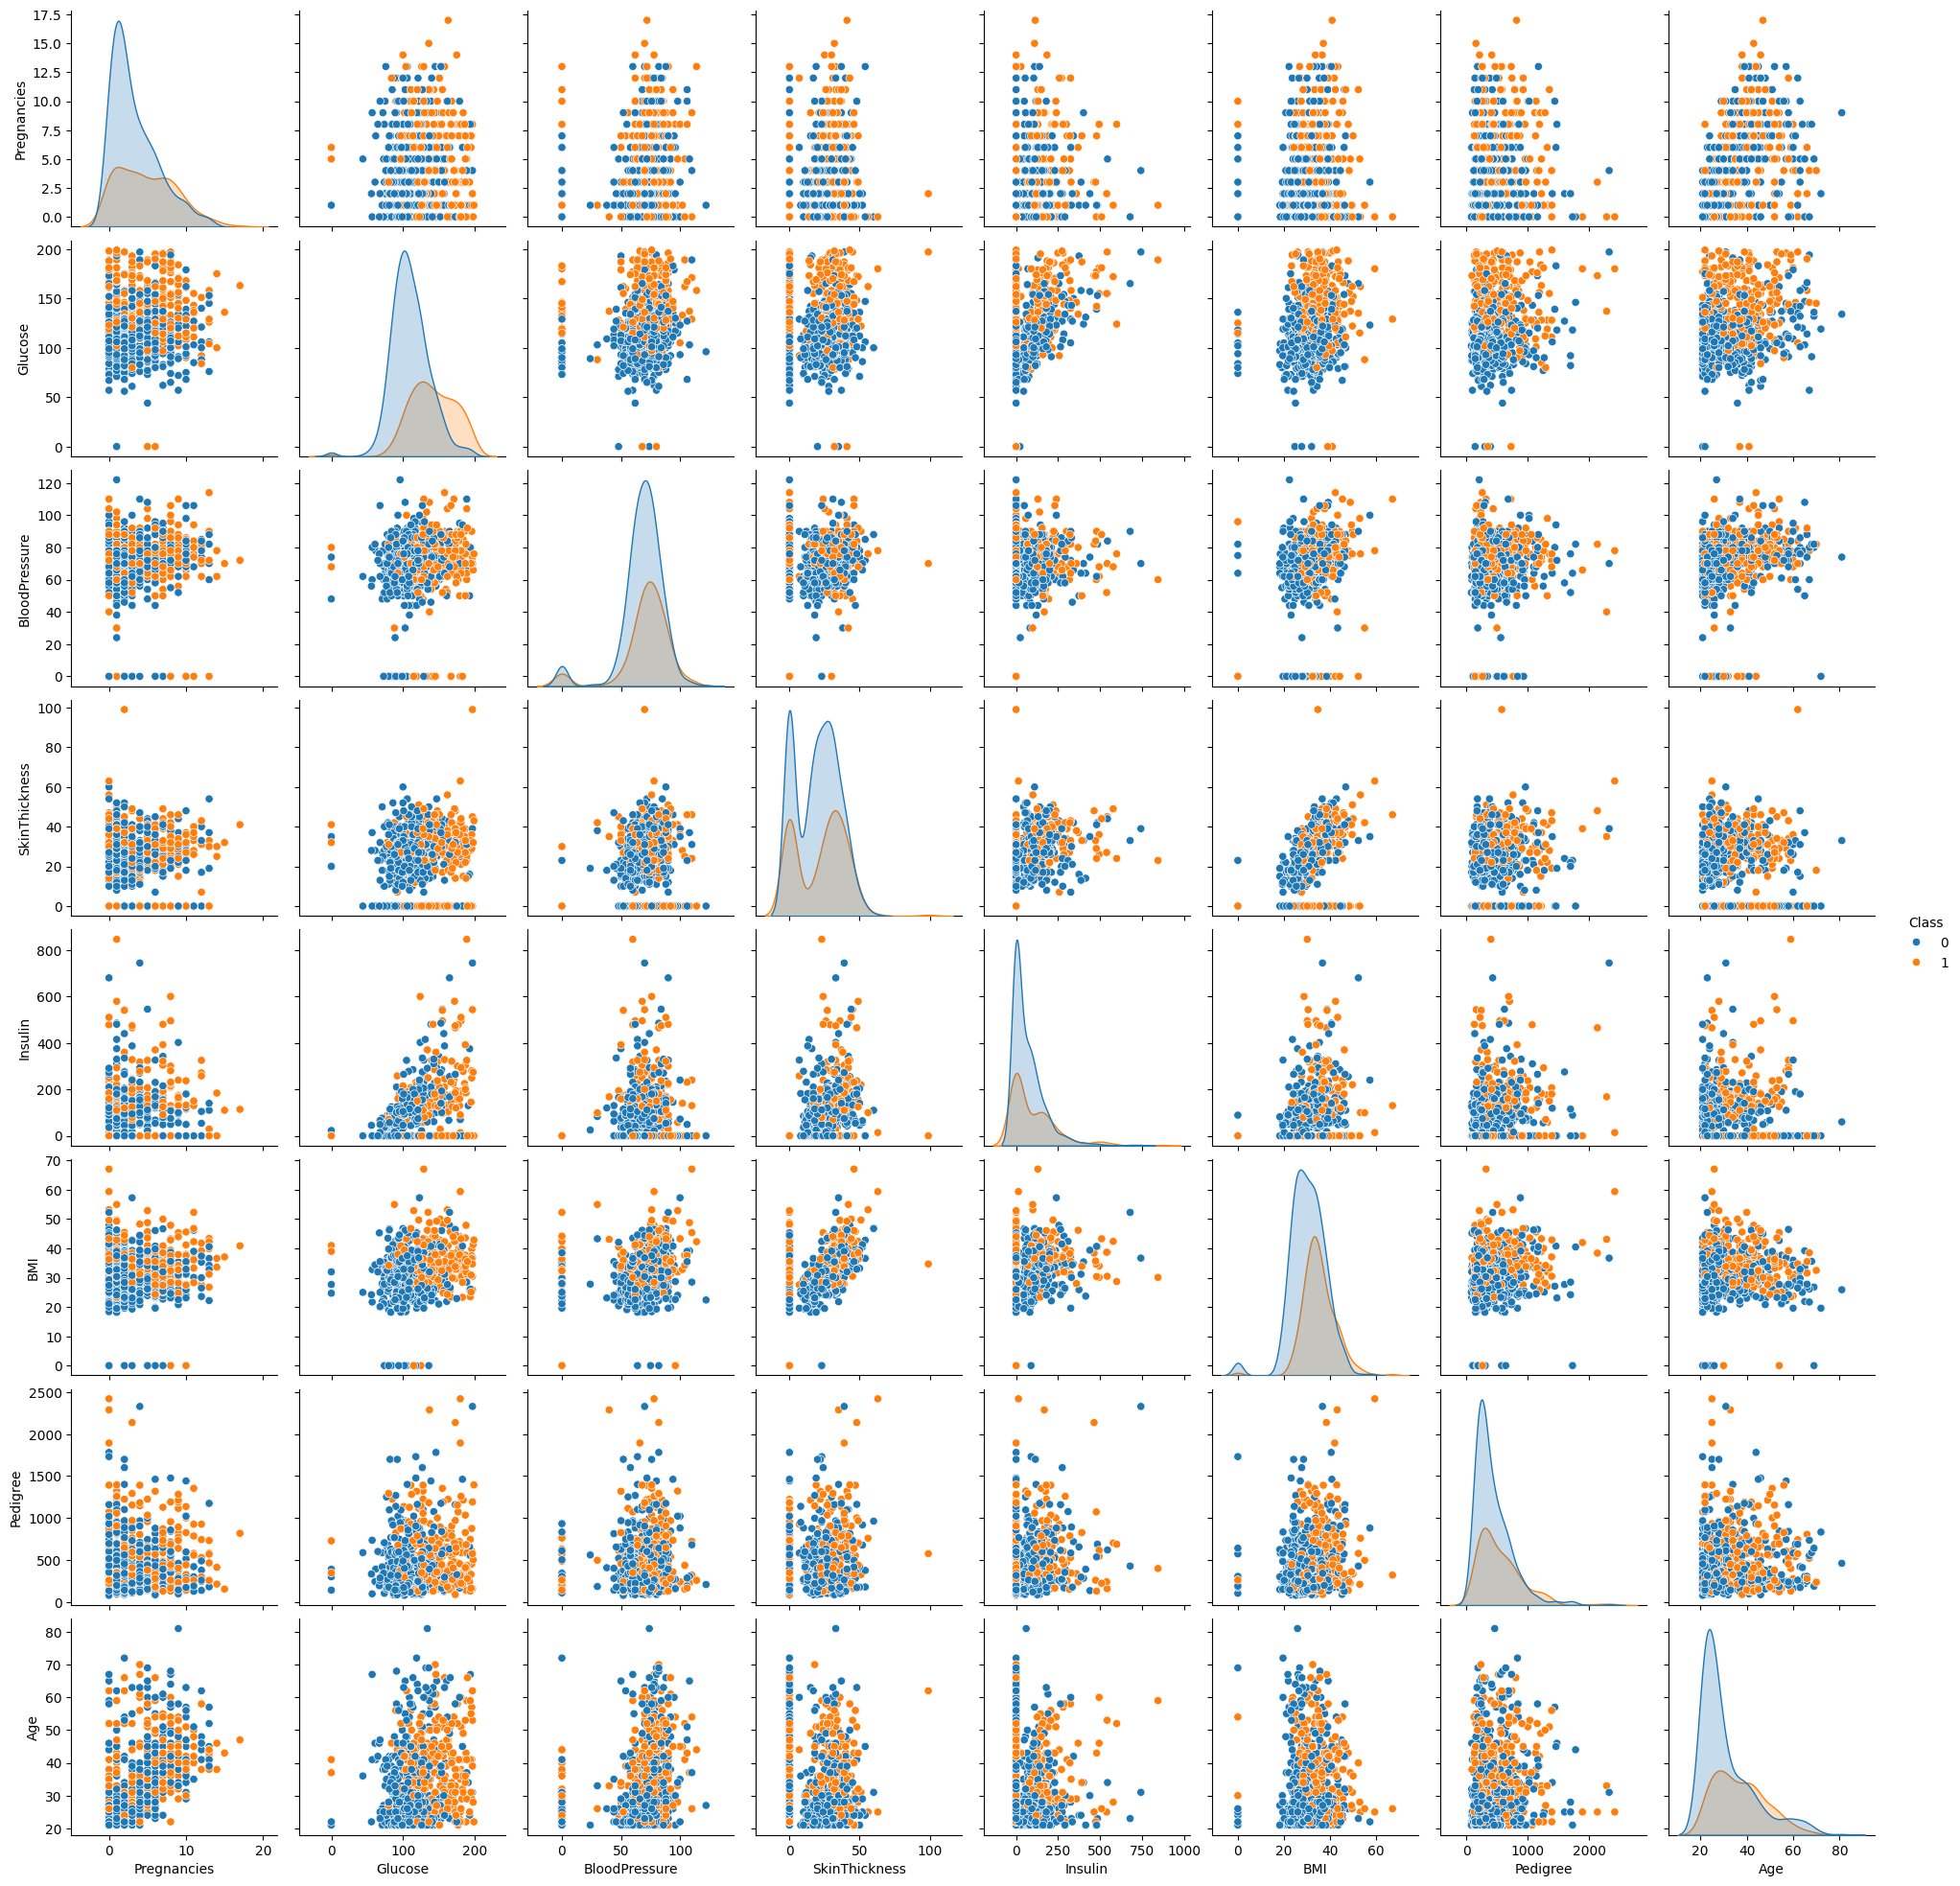

In [82]:
sns.pairplot(df, hue="Class")

In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.0,1.00,3.0,6.00,17.0
Glucose,768.0,120.894531,31.972618,0.0,99.00,117.0,140.25,199.0
BloodPressure,768.0,69.105469,19.355807,0.0,62.00,72.0,80.00,122.0
SkinThickness,768.0,20.536458,15.952218,0.0,0.00,23.0,32.00,99.0
Insulin,768.0,79.799479,115.244002,0.0,0.00,30.5,127.25,846.0
BMI,768.0,31.992578,7.884160,0.0,27.30,32.0,36.60,67.1
Pedigree,768.0,471.876302,331.328595,78.0,243.75,372.5,626.25,2420.0
Age,768.0,33.240885,11.760232,21.0,24.00,29.0,41.00,81.0
Class,768.0,0.348958,0.476951,0.0,0.00,0.0,1.00,1.0


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [85]:
X = df.drop('Class', axis=1)
y = df['Class']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

GAUSSIAN NAIVE BAYES

In [87]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [88]:
gnb_pred = gnb.predict(X_test)

In [89]:
acuracia = accuracy_score(y_test, gnb_pred)
precisao = precision_score(y_test, gnb_pred, average='weighted')
recuperacao = recall_score(y_test, gnb_pred, average='weighted')
f1 = f1_score(y_test, gnb_pred, average='weighted')

In [90]:
print(f'Acurácia do Naive Bayes: {acuracia:.3f}')
print(f'Precisão do Naive Bayes: {precisao:.3f}')
print(f'Recall do Naive Bayes: {recuperacao:.3f}')
print(f'F1-Score: {f1:.3f}')
print(classification_report(y_test, gnb_pred))

Acurácia do Naive Bayes: 0.784
Precisão do Naive Bayes: 0.780
Recall do Naive Bayes: 0.784
F1-Score: 0.779
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       146
           1       0.75      0.62      0.68        85

    accuracy                           0.78       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



DECISION TREE CLASSIFIER

In [92]:
dt= DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [93]:
dt_pred = dt.predict(X_test)

In [94]:
acuracia = accuracy_score(y_test, dt_pred)
precisao = precision_score(y_test, dt_pred, average='weighted')
recuperacao = recall_score(y_test, dt_pred, average='weighted')
f1 = f1_score(y_test, dt_pred, average='weighted')

In [95]:
print(f'Acurácia de Decision Tree Classifier: {acuracia:.3f}')
print(f'Precisão de Decision Tree Classifier: {precisao:.3f}')
print(f'Recall de Decision Tree Classifier: {recuperacao:.3f}')
print(f'F1-Score: {f1:.3f}')
print(classification_report(y_test, dt_pred))

Acurácia de Decision Tree Classifier: 0.693
Precisão de Decision Tree Classifier: 0.687
Recall de Decision Tree Classifier: 0.693
F1-Score: 0.689
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       146
           1       0.59      0.53      0.56        85

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



SUPPORT VECTOR MACHINE

In [96]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [97]:
svm_clf_pred = svm_clf.predict(X_test)

In [98]:
acuracia = accuracy_score(y_test, svm_clf_pred)
precisao = precision_score(y_test, svm_clf_pred, average='weighted')
recuperacao = recall_score(y_test, svm_clf_pred, average='weighted')
f1 = f1_score(y_test, svm_clf_pred, average='weighted')

In [99]:
print(f'Acurácia de Support Vecto Machine: {acuracia:.3f}')
print(f'Precisão de Support Vecto Machine: {precisao:.3f}')
print(f'Recall de Support Vecto Machine: {recuperacao:.3f}')
print(f'F1-Score: {f1:.3f}')
print(classification_report(y_test, svm_clf_pred))

Acurácia de Support Vecto Machine: 0.792
Precisão de Support Vecto Machine: 0.792
Recall de Support Vecto Machine: 0.792
F1-Score: 0.784
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       146
           1       0.79      0.59      0.68        85

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



Diante dos resultados, o melhor desempenho foi no modelo de Support Vector Machine